# Project Name: Disease Predictor

### Goal: To predict the disease a patient is suffering from based on the symptoms.

**Dataset**: Kaggle Disease Prediction Dataset ( https://www.kaggle.com/datasets/kaushil268/disease-prediction-using-machine-learning )

**About the Project**: People can be suffering from numerous diseases which constitute of various combinations of symtoms. 
It is often difficult for a doctor to remember each disease and it's symptoms, which may cause incorrect prognosis leading to incorrect medication being provided. This can lead to worsening of the actual disease, and sometimes may prove to be fatal.

To avoid this, we design a Machine Learning Model which will be provided adequate data upon various symptoms and diseases, and will be used by us to provide assistance in recognising the disease a person is suffering from based on the symptoms, provided as input.

#### Section 1: Collecting the data

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r"C:\Users\goura\Desktop\Data Science\Datasets\Disease - Train.csv").dropna(axis=1)
data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


### Section 2: Data Manipulation / Cleaning

We need to check for the number of times each disease is occuring in the dataset.

Why? Incase any disease is present in a significantly higher proportion than other diseases, it may cause the Algorhithm to make biased predictions in favour of that disease. To avoid this, we need to normalize the data, so have a fair representation of each kind od disease.

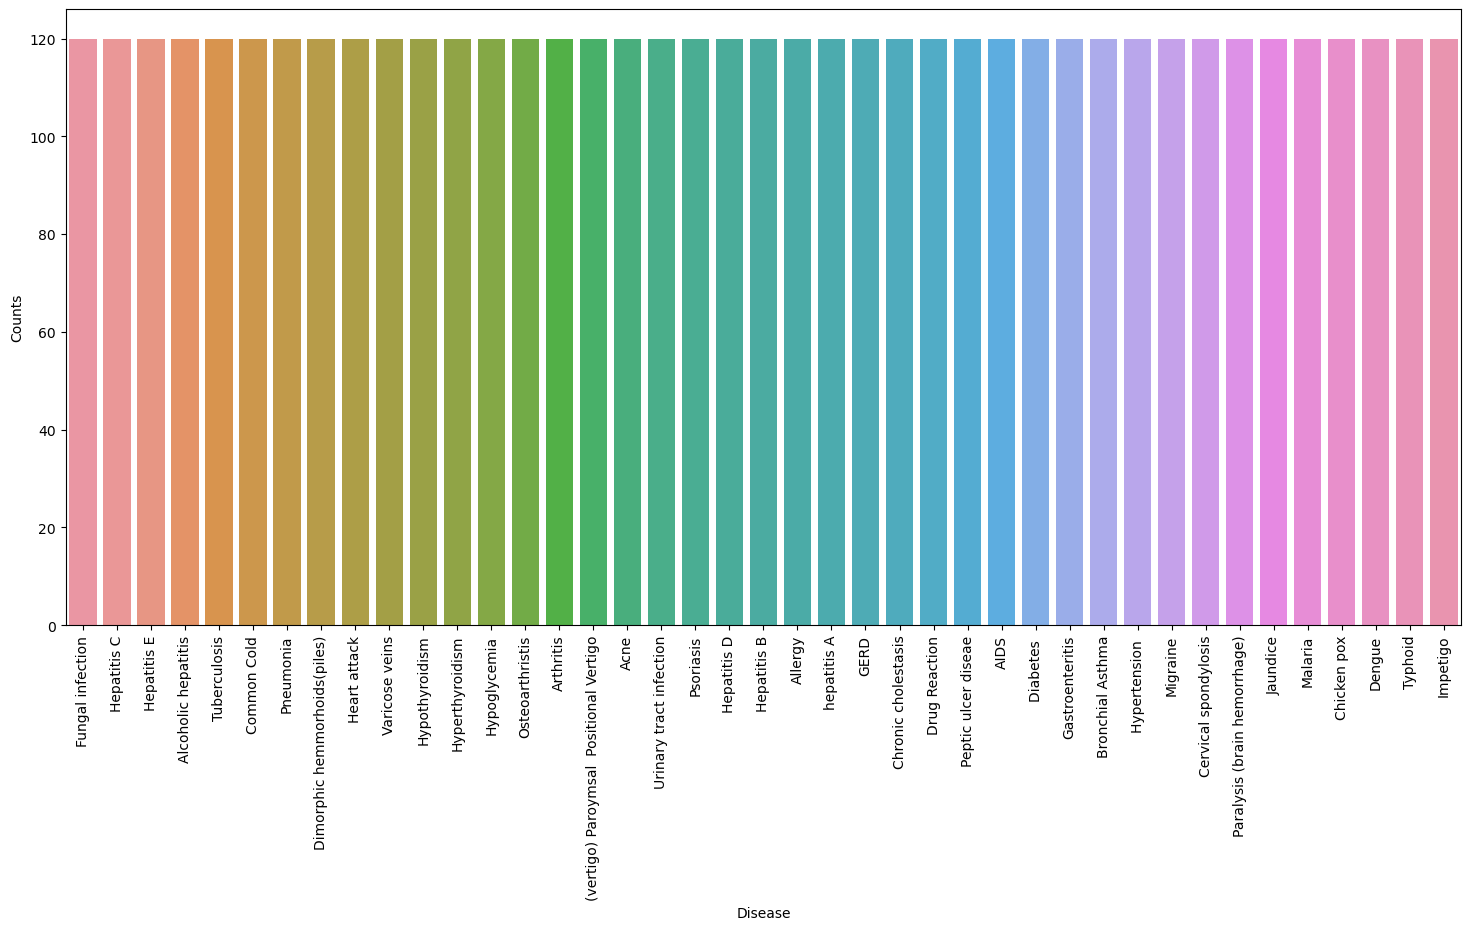

In [3]:
disease_counts = data["prognosis"].value_counts()
temp_df = pd.DataFrame({
    "Disease": disease_counts.index,
    "Counts": disease_counts.values})
plt.figure(figsize=(18,8))
sns.barplot(x = "Disease", y = "Counts", data = temp_df)
plt.xticks(rotation=90)
plt.show()

Since all the diseases are recorded in equal frequency { 120 each }, no normalization is required.

The "prognosis" column of the dataset is a categorical variable.

Converting categorical variables to numerical variables prove to yield better results. We will acheive this by using the **LabelEncoder**.

In [4]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data["prognosis"] = encoder.fit_transform(data["prognosis"])
data

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,2
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,38
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,0,0,0,35


Now that the manipulation of data is done, we need to split the data into different parts, on the basis of
* Features, Label [ to distinguish the columns used to make predictions and the column to be predicted ]
* Train, Test [ to distinguish data we will train our model on and data we will test the trained model on ]

We will use the **Stratified Shuffle Split**, due to such splits being a representatinve of the entire dataset.

In [5]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(data,data['prognosis']):
    train_set = data.loc[train_index]
    test_set = data.loc[test_index]

In [6]:
train_set

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
3374,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
1432,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,19
3663,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,28
3296,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
3232,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,25
2608,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,36
2160,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,30
1449,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,20


In [7]:
columnlist = [i for i in data.columns]
features = columnlist[:-1]
label = columnlist[-1]

In [8]:
X_train = train_set[features]
X_test = test_set[features]
Y_train = train_set[label]
Y_test = test_set[label]

In [9]:
X = pd.concat([X_train,X_test])
Y = pd.concat([Y_train,Y_test])

Lets have a look at all the created parts of the dataset. 
* X (all rows of feature columns),
* Y (all rows of label column),
* X_train (training rows of feature columns),
* X_test (testing rows of feature columns),
* Y_train (training rows of label column),
* Y_test (testing rows of label column)

### Section 3: Model Selection & Training

Now, we define both the set of models we will use as well as the error function.

In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [11]:
def cv_scoring(estimator,X,Y):
    return accuracy_score(Y, estimator.predict(X))

In [12]:
models = {
    "SVC" : SVC(),
    "GaussNB" : GaussianNB(),
    "RFC" : RandomForestClassifier(random_state=18)
}

In [13]:
for model_name in models:
    model = models[model_name]
    scores = cross_val_score(model,X,Y,cv=10,scoring = cv_scoring)
    print("=="*30) 
    print(model_name) 
    print(f"Scores: {scores}") 
    print(f"Mean Score: {np.mean(scores)}")

SVC
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
GaussNB
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
RFC
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0


As we see, the mean score for all the models if 1, which stands for all predictions being correct.

Lets test the accuracy of **SVC** model of both the Training and Testing set

Accuracy on train data by SVM Classifier: 100.00%
Accuracy on test data by SVM Classifier: 100.00%


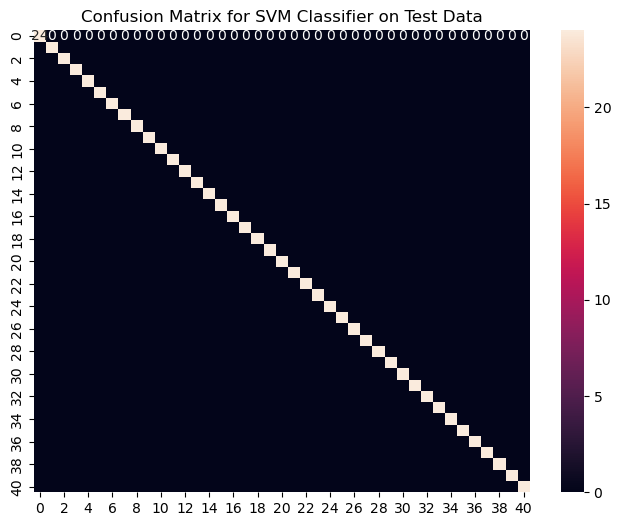

In [14]:
svm_model = SVC()
svm_model.fit(X_train,Y_train)
preds = svm_model.predict(X_test)

train_accuracy = accuracy_score(Y_train, svm_model.predict(X_train)) * 100
print(f"Accuracy on train data by SVM Classifier: {train_accuracy:.2f}%")


test_accuracy = accuracy_score(Y_test, preds) * 100
print(f"Accuracy on test data by SVM Classifier: {test_accuracy:.2f}%")

cf_matrix = confusion_matrix(Y_test, preds) 
plt.figure(figsize=(8,6))
plt.title("Confusion Matrix for SVM Classifier on Test Data") 
sns.heatmap(cf_matrix,annot=True)
plt.show()

A 100% accuracy in either of the datasets represent good performance of thrr SVC model

Lets test the accuracy of **RandomForestClassifier** model of both the Training and Testing set

Accuracy on train data by Random Forest Classifier: 100.00%
Accuracy on test data by Random Forest Classifier: 100.00%


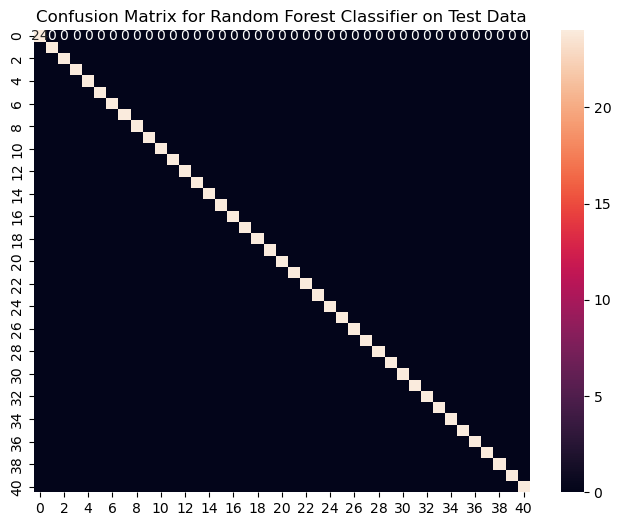

In [15]:
rf_model = RandomForestClassifier(random_state=18) 
rf_model.fit(X_train, Y_train) 
preds = rf_model.predict(X_test) 

train_accuracy = accuracy_score(Y_train, rf_model.predict(X_train)) * 100
print(f"Accuracy on train data by Random Forest Classifier: {train_accuracy:.2f}%")
  
test_accuracy = accuracy_score(Y_test, rf_model.predict(X_test)) * 100
print(f"Accuracy on test data by Random Forest Classifier: {test_accuracy:.2f}%")

cf_matrix = confusion_matrix(Y_test, preds) 
plt.figure(figsize=(8,6))
plt.title("Confusion Matrix for Random Forest Classifier on Test Data") 
sns.heatmap(cf_matrix,annot=True)
plt.show()

A 100% accuracy in either of the datasets represent good performance of the Random Forest Classifier model

Lets test the accuracy of **Gaussian Naive Bayes** model of both the Training and Testing set

Accuracy on train data by GaussianNB Classifier: 100.00%
Accuracy on test data by GaussianNB Classifier: 100.00%


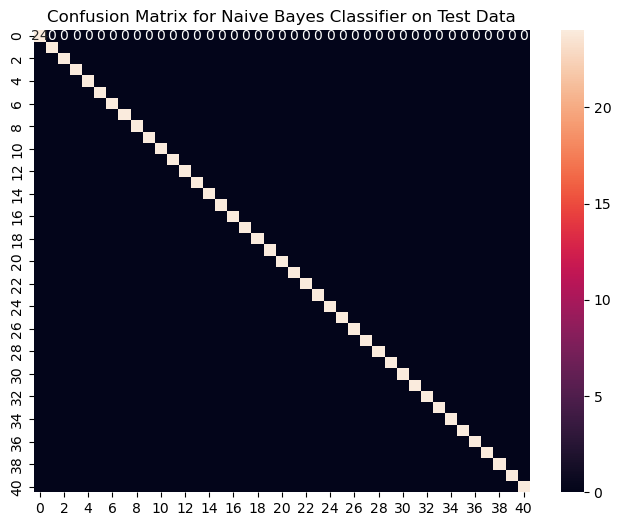

In [16]:
nb_model = GaussianNB()
nb_model.fit(X_train,Y_train)
preds = nb_model.predict(X_test)

train_accuracy = accuracy_score(Y_train, nb_model.predict(X_train))*100
print(f"Accuracy on train data by GaussianNB Classifier: {train_accuracy:.2f}%")

test_accuracy = accuracy_score(Y_test, nb_model.predict(X_test)) * 100
print(f"Accuracy on test data by GaussianNB Classifier: {test_accuracy:.2f}%")

cf_matrix = confusion_matrix(Y_test, preds) 
plt.figure(figsize=(8,6))
plt.title("Confusion Matrix for Naive Bayes Classifier on Test Data") 
sns.heatmap(cf_matrix,annot=True)
plt.show()

A 100% accuracy in either of the datasets represent good performance of the Gaussian Naive Bayes model

Since all 3 models are performing well on both the datasets, we move forward to finalize these models, by fitting the entire dataset into them. This helps the model to be more accurate on larger/wider datasets.

We will now use another separate dataset as the testing data for these models

In [17]:
final_svm = SVC()
final_nb = GaussianNB()
final_rf = RandomForestClassifier(random_state=18)
final_svm.fit(X,Y)
final_nb.fit(X,Y)
final_rf.fit(X,Y)
test_data = pd.read_csv(r"C:\Users\goura\Desktop\Data Science\Datasets\Disease - Test.csv").dropna(axis=1)
test_data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


In [18]:
test_X = test_data[features]
test_Y = test_data[label]
test_Y = encoder.transform(test_Y)

In [19]:
svm_preds = final_svm.predict(test_X)
nb_preds = final_nb.predict(test_X)
rf_preds = final_rf.predict(test_X)

Now, we have the predictions made by all 3 models, which are arguably highly accurate models, we can take the mode of each set of predictions to make a final prediction. This is because, with all models having a 95%+ accuracy, the chances of 2 models being wrong is just 0.25%.

This margin is error is extremely low, providing an accuracy of **99.75%** or higher.

Thus, we proceed with this approach.

### Section 4: Finalizing Prediction

In [21]:
final_preds = [mode([i, j, k])[0] for i, j, k in zip(svm_preds, nb_preds, rf_preds)]

In [22]:
print("Accuracy of the combined model on thee test data set is: ",accuracy_score(test_Y,final_preds)*100)

Accuracy of the combined model on thee test data set is:  100.0


Once again, the predictions of the collective model set shows 100% accuracy on the test dataset.

Lets have a look at the predictions of each model.

In [23]:
for q in [(i,j,k) for i,j,k in zip(svm_preds, nb_preds, rf_preds)]:
    print(q)

(15, 15, 15)
(4, 4, 4)
(16, 16, 16)
(9, 9, 9)
(14, 14, 14)
(33, 33, 33)
(1, 1, 1)
(12, 12, 12)
(17, 17, 17)
(6, 6, 6)
(23, 23, 23)
(30, 30, 30)
(7, 7, 7)
(32, 32, 32)
(28, 28, 28)
(29, 29, 29)
(8, 8, 8)
(11, 11, 11)
(37, 37, 37)
(40, 40, 40)
(19, 19, 19)
(20, 20, 20)
(21, 21, 21)
(22, 22, 22)
(3, 3, 3)
(36, 36, 36)
(10, 10, 10)
(34, 34, 34)
(13, 13, 13)
(18, 18, 18)
(39, 39, 39)
(26, 26, 26)
(24, 24, 24)
(25, 25, 25)
(31, 31, 31)
(5, 5, 5)
(0, 0, 0)
(2, 2, 2)
(38, 38, 38)
(35, 35, 35)
(27, 27, 27)
(15, 15, 8)


As it can be seen, all the models provide the same prediction for most of the entries, but for the last entry, the Random Forest Classifier provides a incorrect prediction (8).

But that incorrect prediction doesnt affect our overall accuracy due to the other two models recitifying the classification to the correct class (15).

Note: The chances of RF model being correct and the other two being incorrect and the same is not 0, but extremely close to ( <0.01% )

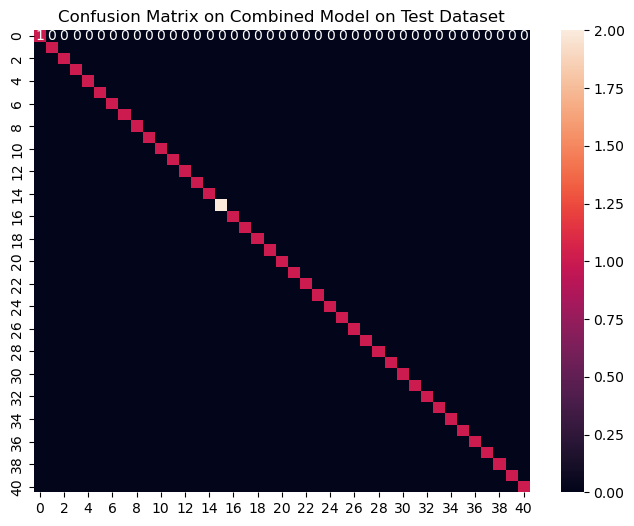

In [24]:
cf_matrix = confusion_matrix(test_Y, final_preds)
plt.figure(figsize=(8,6))
sns.heatmap(cf_matrix,annot = True)
plt.title("Confusion Matrix on Combined Model on Test Dataset") 
plt.show()

Our models are now prepared to make accurate predictions.

Our next step is to make this program user interactive, such that the program can provide the disease name as the output for some set of symptoms as input.

### Section 5: Creating User-Model interaction space

Since our models make numerical predictions (due to being encoded earlier), we need to convert these numerical output to meaningful output i.e. name of the disease.

Below is a function to receive the name of symptoms, and thus make appropriate changes to make the predictions.

In [25]:
symptoms = X_train.columns.values
symptom_index = {}
for index, value in enumerate(symptoms):
    symptom = " ".join([i.capitalize() for i in value.split("_")])
    symptom_index[symptom] = index
data_dict = {
    "symptom_index": symptom_index,
    "predictions_classes": encoder.classes_
}
def predictDisease(symptoms): 
    symptoms = symptoms.split(",") 
    input_data = [0] * len(data_dict["symptom_index"]) 
    for symptom in symptoms: 
        index = data_dict["symptom_index"][symptom] 
        input_data[index] = 1
    input_data = np.array(input_data).reshape(1,-1)
    rf_prediction = data_dict["predictions_classes"][final_rf.predict(input_data)[0]] 
    nb_prediction = data_dict["predictions_classes"][final_nb.predict(input_data)[0]] 
    svm_prediction = data_dict["predictions_classes"][final_svm.predict(input_data)[0]]
    lst=[rf_prediction,svm_prediction,nb_prediction]
    final_prediction=max(set(lst), key=lst.count)
    return final_prediction

The below code is the user-interactive portion of the program, responsible for receiving input and providing the output, till the user is satisfied.

In [27]:
i=1
while True:
    if i==1:
        print("Do you want to make any predictions?")
    elif i>1:
        print("Do you want to make more predictions?")
    a = int(input("Enter 1 if Yes, else 0: "))
    if a != 1 and a!= 0:
        print("Invalid input")
    elif a == 0:
        print("Input: 0 - No")
        if i==1:
            print("Program Exit")
        elif i>1:
            print("Thank You for using our services.\nProgram Exit")
        break
    elif a == 1:
        print("Input: 1 - Yes")
        str = input("Enter the symptoms in comma separated format: ")
        disease = predictDisease(str)
        print(disease)
        i+=1

Do you want to make any predictions?


Enter 1 if Yes, else 0:  0


Input: 0 - No
Program Exit


### Conclusion

This marks the end of our program.

We predicted the diseases of patients based on the symptoms they were suffering from, by using 3 different models and combining their predictions to find the final prediction, using the mode strategy.<br>
Our combined model predictictions have yet provided us with 100% accuracy, and the individual models as well have provided 100% accuracy with the exception of RF model, which provided a accuracy of 99%+. We can conclude that our combined model will provide us with predictions of **accuracy over 99.7%** on unknown & similar datasets.